<a href="https://colab.research.google.com/github/kaushikpichumani/Stock-Market-Analysis/blob/main/pcrValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from pytz import timezone 
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
timenew = []
pcrVal = []
callVal1 = []
putVal1 = []
diff = []

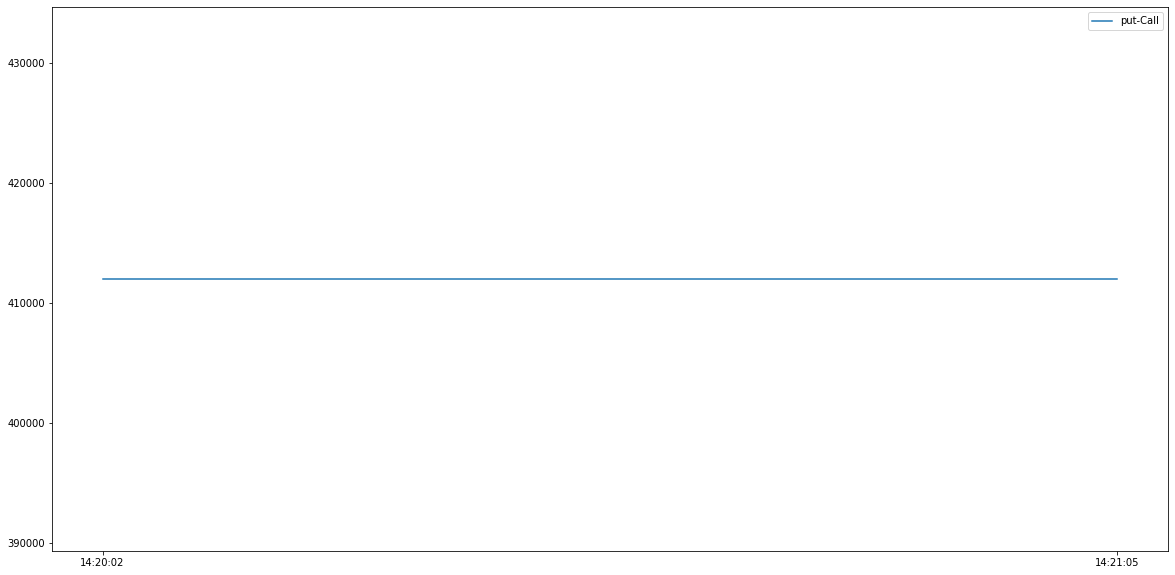

KeyboardInterrupt: ignored

In [4]:
for i in range(370):
    now = datetime.now(timezone("Asia/Kolkata"))
    clear_output(wait=True)
    current_time = now.strftime("%H:%M:%S")
    timenew.append(current_time)
    page=requests.get('https://www.moneycontrol.com/india/indexfutures/banknifty/23/?classic=true')
    soup = BeautifulSoup(page.content,'html.parser')
    price = soup.find('div', {'id': 'datatab3_1'}).get_text().split('\n\n')
    callVal=(int(price[4].split('\n')[2].replace(',','')))
    callVal1.append(callVal)
    putVal=(int(price[5].split('\n')[2].replace(',','')))
    putVal1.append(putVal)
    diff.append(putVal-callVal)
    plt.plot(timenew,diff,label='put-Call')
    #plt.plot(timenew,putVal,label='put')
    plt.legend()
    plt.show()
    time.sleep(60)

In [ ]:
df1 = pd.DataFrame()
df1['diff']=diff
df1['name']='BANKNIFTY'
df1['callVal']=callVal1
df1['putVal']=putVal1
df1.to_csv('C:\\Users\\pkalyan\\Desktop\\docs\\callPut_03-01.csv')